# Part 1 – Present an Overview of Hyper-Parameter Optimization: A Review of Algorithms and Applications (from the attached paper)


Tổng quan & động lực

HPO là gì? Tự động tìm bộ siêu tham số (hyper-parameters) tối ưu cho cả cấu trúc mô hình và quá trình huấn luyện (VD: số lớp ẩn, hàm kích hoạt, optimizer, learning rate, batch size…). Mục tiêu: giảm “thủ công”, cải thiện độ chính xác/tốc độ và tăng khả năng tái lập kết quả. 

Vì sao cần HPO? Mạng sâu ngày càng lớn/phức tạp hoặc nhẹ/tinh gọn khiến việc “tự chỉnh tay” khó và tốn kém; AutoML/HPO giúp hạ ngưỡng sử dụng ML trong nghiên cứu & công nghiệp.



Hyper-Parameter Optimization (Tối ưu siêu tham số) là quá trình tự động tìm kiếm và lựa chọn bộ siêu tham số tối ưu cho mô hình học máy. Các siêu tham số này có thể liên quan đến:

Cấu trúc mô hình: số lớp ẩn, số neuron, loại hàm kích hoạt.

Quá trình huấn luyện: optimizer (SGD, Adam…), learning rate, batch size, số epoch…
Mục tiêu chính:

Giảm thiểu công việc “thử thủ công” vốn tốn nhiều thời gian và kinh nghiệm.

Cải thiện độ chính xác và tốc độ huấn luyện.

Tăng khả năng tái lập kết quả (reproducibility).

Động lực và Lý do cần HPO

Mô hình ngày càng phức tạp

Deep learning hiện nay có thể chứa hàng trăm triệu tham số.

Việc điều chỉnh thủ công không khả thi và rất tốn tài nguyên.

Sự đa dạng của mô hình

Ngoài những mô hình “siêu lớn” (Large Language Models, Vision Transformers), còn có các mô hình nhỏ gọn cho thiết bị di động (MobileNet, TinyML).

Cả hai đều đòi hỏi tối ưu hóa siêu tham số để đạt hiệu năng tốt nhất.

Tiết kiệm chi phí & tài nguyên

Thử sai (trial-and-error) bằng tay dẫn đến lãng phí GPU/TPU, thời gian nghiên cứu.

HPO tự động có thể rút ngắn chu kỳ phát triển.

AutoML và phổ cập ML

HPO là một thành phần cốt lõi trong AutoML (Automated Machine Learning).

Giúp giảm ngưỡng tiếp cận ML cho nhà nghiên cứu, kỹ sư, và cả doanh nghiệp không chuyên về AI.

# Part 2- Image Classification & Hyperparameter Turning on Fashion-MNIST.

The objective of this project is to predict fashion classes such as pants, shirts, and shoes from grayscale images. This guided project is practical and directly applicable to the fashion industry. You can add this project to your portfolio of projects which is essential for your next job interview.
Learning Objectives
________________________________________
•	Perform data cleaning, feature engineering and visualization
•	Understand the theory and intuition behind artificial neural networks
•	Build, train and test an artificial neural network model in Keras and Tensorflow
Overview of Health Care Systems and


__Objective:__ To classify images of different pieces of clothing.

__Client & Data-Set:__ Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

Data-set is publicly available on kaggle and __[Zalando Fashion MNIST repository](https://github.com/zalandoresearch/fashion-mnist)__ on Github.

Fashion-MNIST is intended as direct drop-in replacement for the original MNIST dataset. It shares the same image size and structure of training and testing splits.

__Business Impact:__ E-commerce companies have lots of items for sale online which requires lots of images to be displayed on their websites, applications and on social media. And it takes lot of human power and time to separate these images into respective groups. This classifier which we are going to build helps businesses to categorize images into respective groups.

__Labels:__ Each training and test example is assigned to one of the following labels:

•	0 - T-shirt/top 
•	1 - Trouser 
•	2 - Pullover 
•	3 - Dress 
•	4 - Coat 
•	5 - Sandal 
•	6 - Shirt 
•	7 - Sneaker 
•	8 - Bag 
•	9 - Ankle boot 

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT  

Problem: Classify images of different pieces of clothing 

Practice on Dataset: Fashion-MNIST

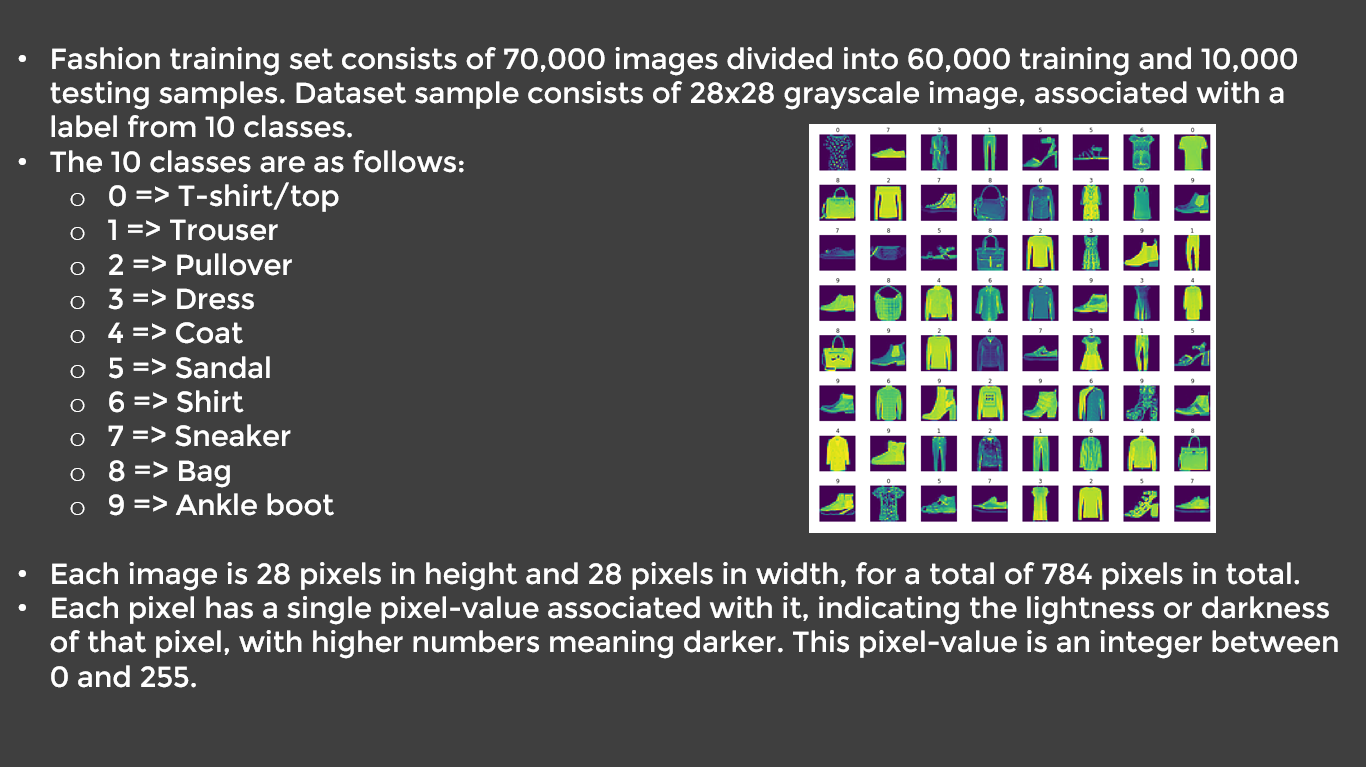

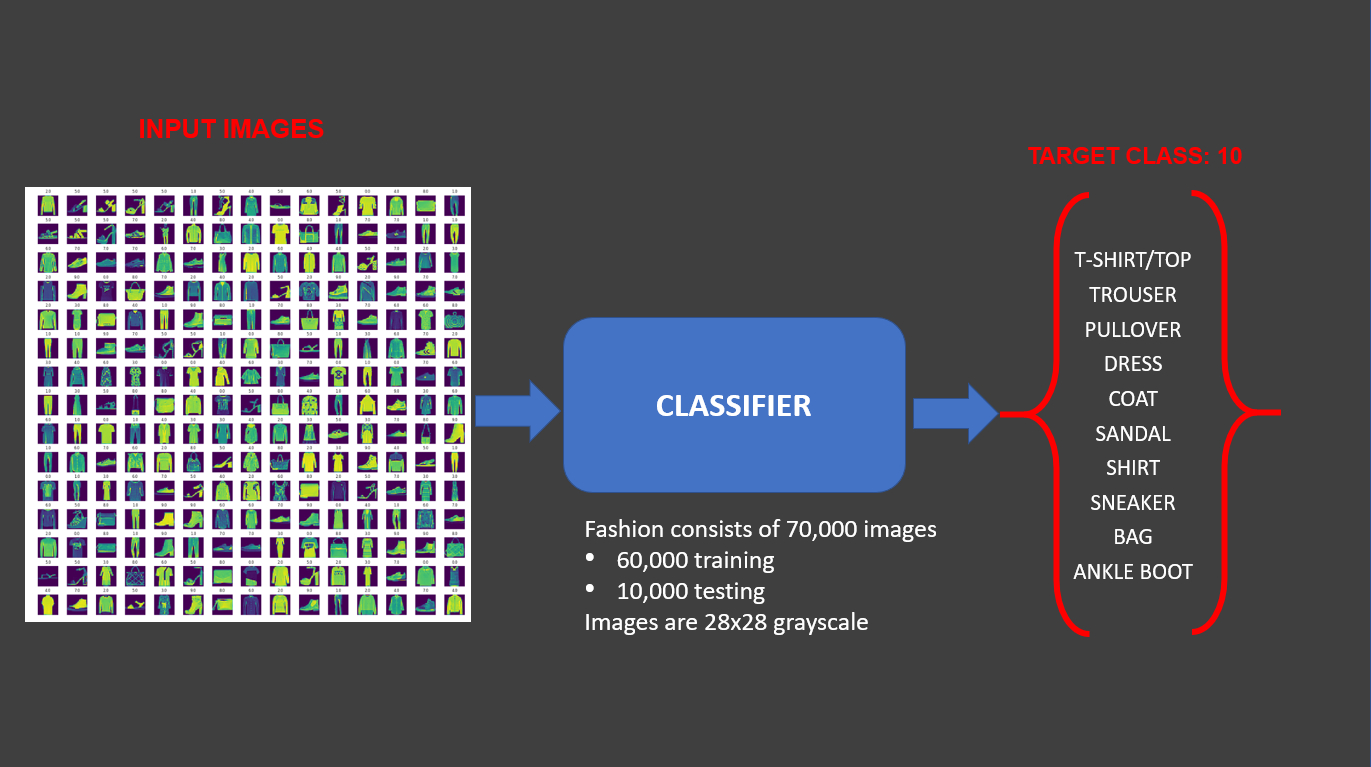

In [48]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import keras
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical #tensorflow.
# from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam #tensorflow.
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [49]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

In [50]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [92]:
X_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [52]:


import matplotlib.pyplot as plt
from jupyterthemes import jtplot
#jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [53]:
# Use the same dataset made readily available by keras Using the following lines of code:


**PRACTICE OPPORTUNITY #1:**
- **Check out the sizes of both training and testing datasets**

In [93]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# TASK #3: PERFORM DATA VISUALIZATION

In [55]:
# Select a sample image and visualize it


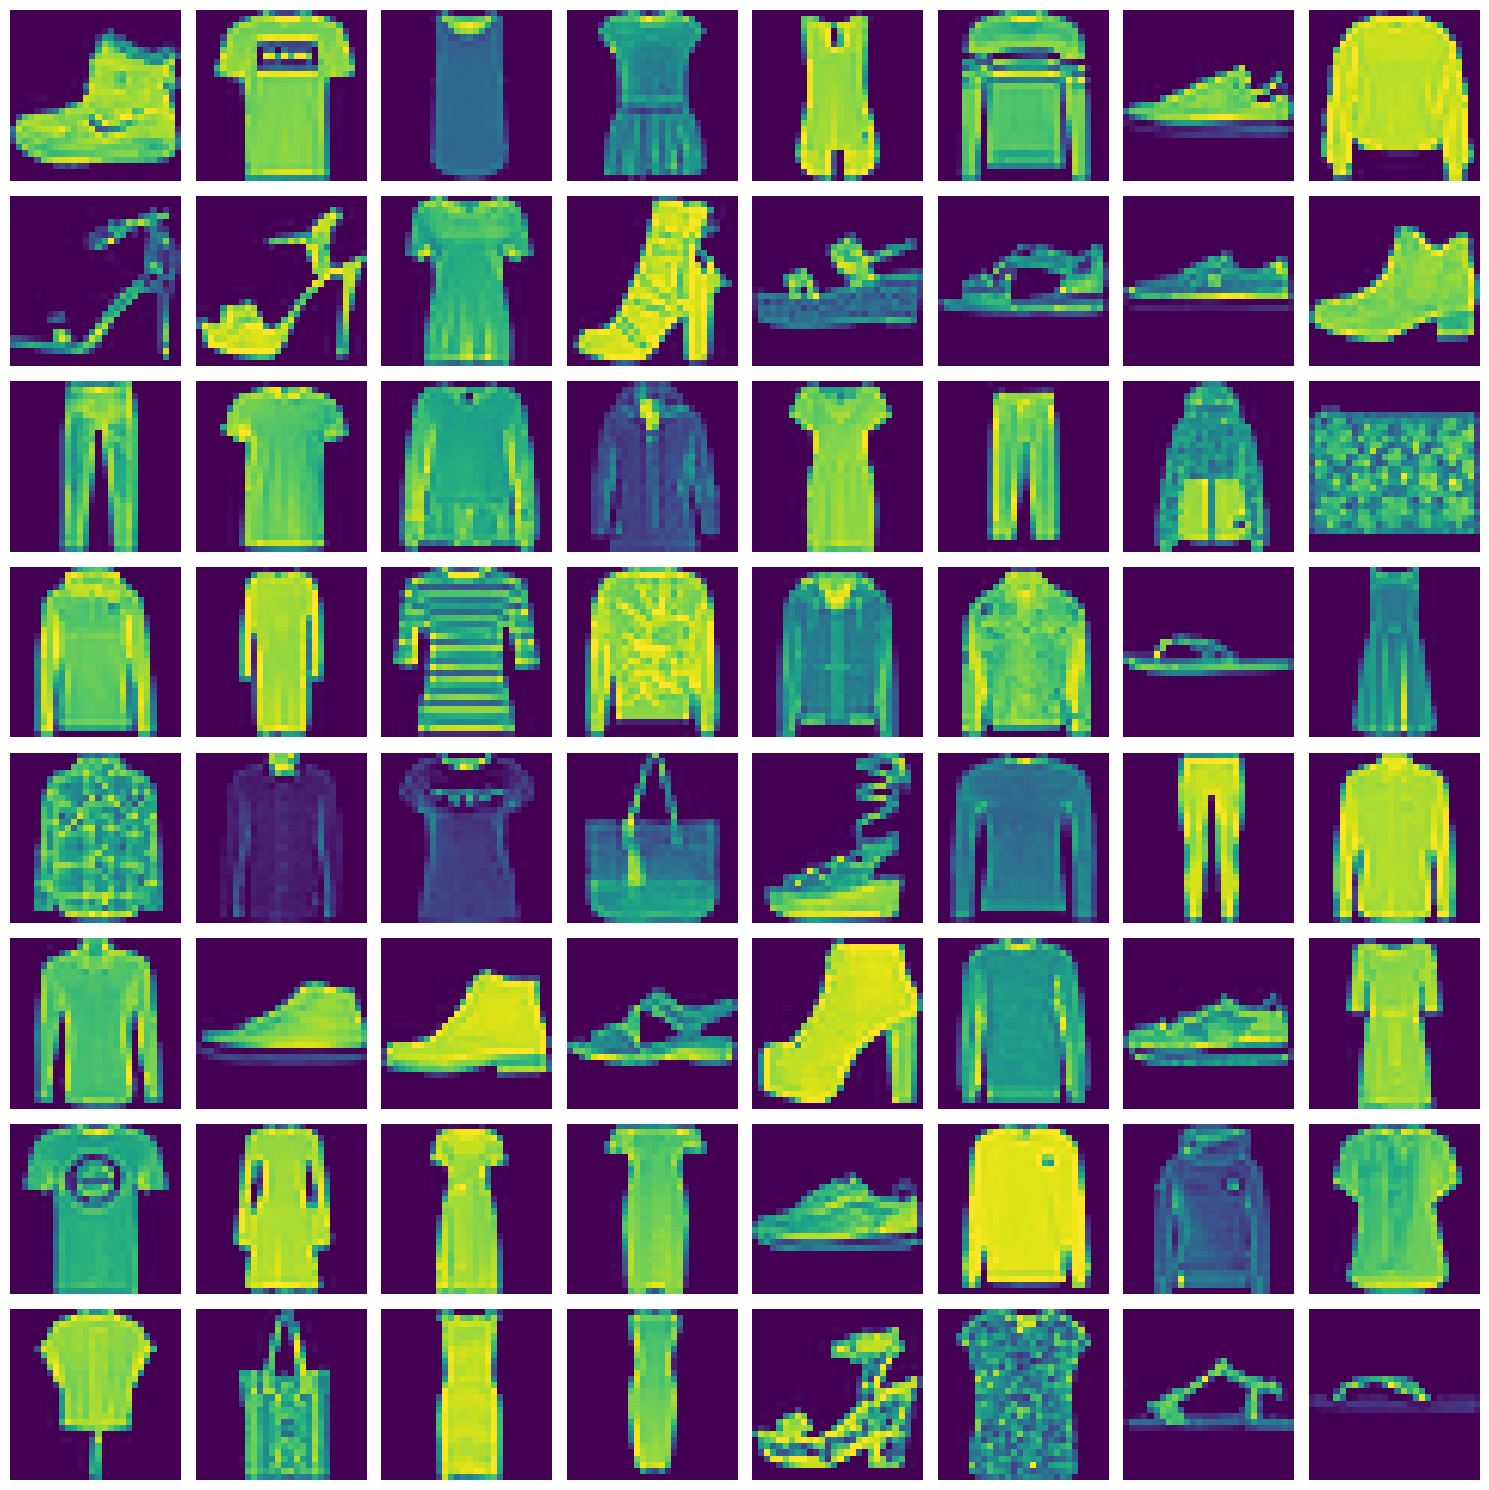

In [ ]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

W_grid = 8
L_grid = 8

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel() #flatten 

for i in range(64):
    axes[i].imshow(X_T[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()





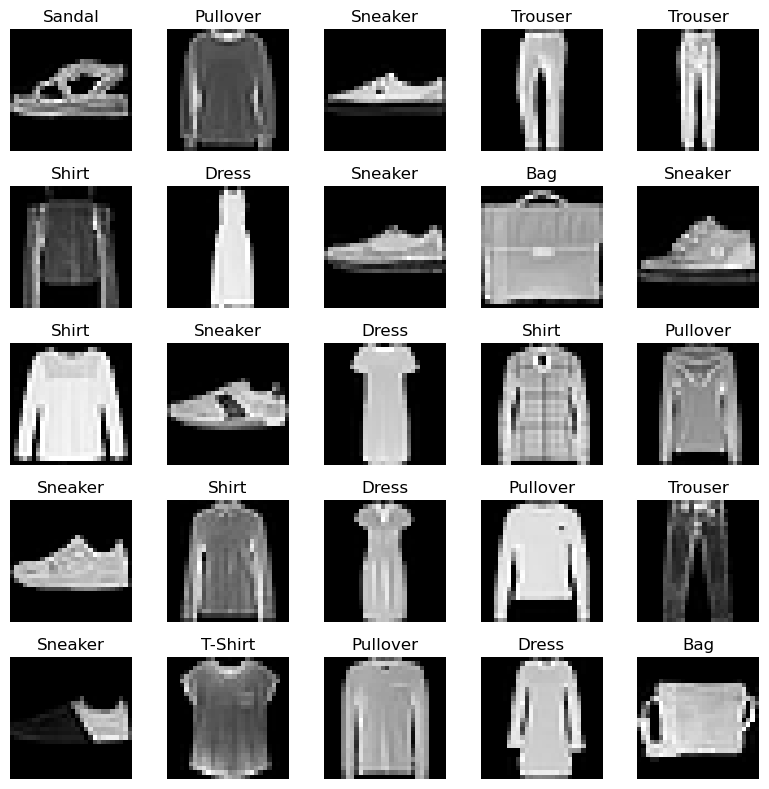

In [ ]:
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8, 8))
for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(X_train))
    img = X_train[data_idx].reshape([28, 28])
    label = labels_map[y_train[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

**PRACTICE OPPORTUNITY #2:**
- **Plot a grid containing 144 images and perform a sanity check on the data** 

# TASK #4: PREPARE THE DATA FOR TRAINING

In [58]:
number_cat = 10
y_train = tf.keras.utils.to_categorical(y_train, number_cat)

In [59]:
X_train.shape

(60000, 28, 28)

In [60]:
y_train.shape

(60000, 10)

In [61]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(60000, 10))

In [62]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [63]:
y_test = tf.keras.utils.to_categorical(test_labels, number_cat)

In [64]:
X_train.shape

(60000, 28, 28)

In [65]:
X_train = np.expand_dims(X_train, axis=-1)

In [66]:
X_train.shape

(60000, 28, 28, 1)

In [67]:
y_train.shape

(60000, 10)

# TASK #5: BUILD A DEEP LEARNING MODEL

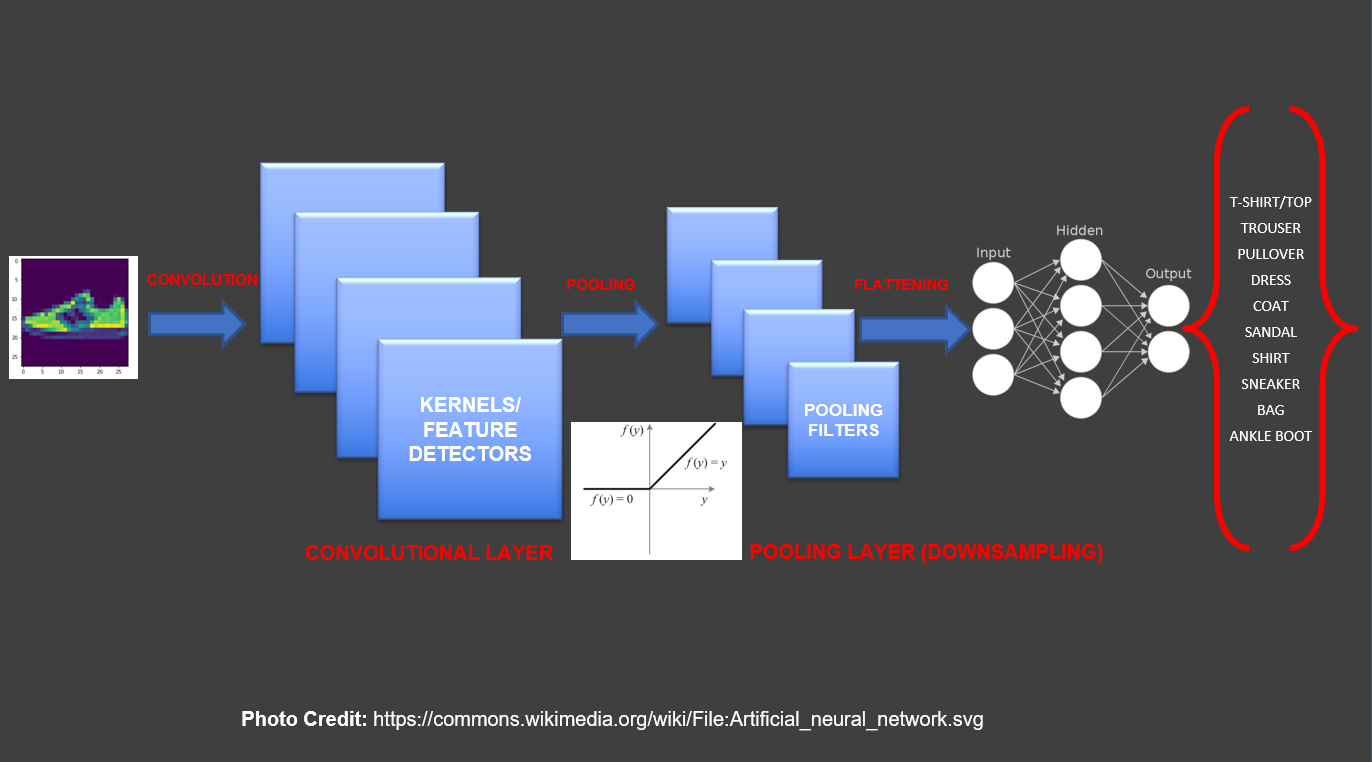

In [68]:
from tensorflow.keras import datasets, layers, models

cnn = models.Sequential([
    layers.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

# TASK #6: COMPILE AND TRAIN A DEEP LEARNING MODEL

In [69]:
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss ='categorical_crossentropy', metrics =['accuracy'])

history = cnn.fit(X_train, y_train,
                  epochs=10,
                  batch_size=32,
                  validation_data=(X_test, y_test))

test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f'\nTest Accuracy: {test_acc:.4f}')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7652 - loss: 0.7424 - val_accuracy: 0.8131 - val_loss: 0.5347
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8483 - loss: 0.4231 - val_accuracy: 0.8477 - val_loss: 0.4248
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8718 - loss: 0.3562 - val_accuracy: 0.8630 - val_loss: 0.3775
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8846 - loss: 0.3196 - val_accuracy: 0.8734 - val_loss: 0.3618
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8947 - loss: 0.2919 - val_accuracy: 0.8755 - val_loss: 0.3553
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9016 - loss: 0.2743 - val_accuracy: 0.8813 - val_loss: 0.3463
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9070 - loss: 0.2574 - val_accuracy: 0.8823 - val_loss: 0.3307
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9123 - loss: 0.2440 - 

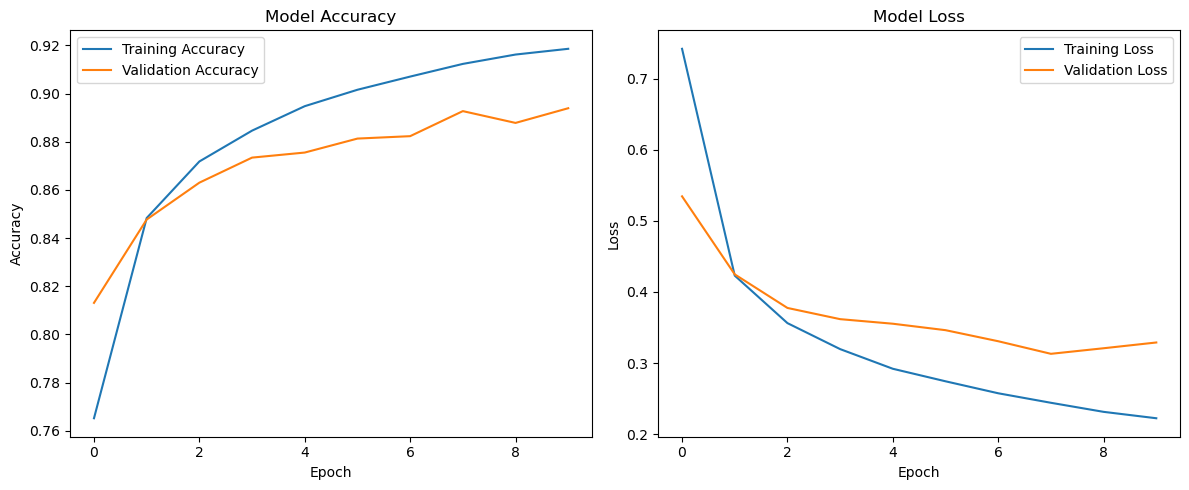

In [94]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

# Task 7: Perform hyperparameter tuning using Keras Tuner.
Example: Define a custom tuner class implementing Bayesian Optimization for tuning model parameters.


In [96]:
# !pip install keras-tuner --quiet
import os, glob, numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

tf.random.set_seed(42)
np.random.seed(42)

# -----------------------------
# 1) Data: Fashion-MNIST (28x28x1)
# -----------------------------
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = (x_train.astype("float32") / 255.0)[..., None]
x_test  = (x_test.astype("float32")  / 255.0)[..., None]

# -----------------------------
# 2) Model builder with HyperParameters
# -----------------------------
def build_model(hp: kt.HyperParameters) -> keras.Model:
    inputs = keras.Input(shape=(28, 28, 1))

    # Conv blocks
    x = layers.Conv2D(
        filters=hp.Int("filters_1", 32, 128, step=32),
        kernel_size=3, activation="relu", padding="same")(inputs)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(
        filters=hp.Int("filters_2", 32, 128, step=32),
        kernel_size=3, activation="relu", padding="same")(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(
        filters=hp.Int("filters_3", 32, 128, step=32),
        kernel_size=3, activation="relu", padding="same")(x)

    x = layers.Flatten()(x)
    x = layers.Dense(
        units=hp.Int("dense_units", 64, 512, step=64),
        activation=hp.Choice("dense_activation", ["relu", "gelu", "tanh"])
    )(x)
    x = layers.Dropout(hp.Float("dropout", 0.0, 0.5, step=0.1))(x)
    outputs = layers.Dense(10, activation="softmax")(x)

    model = keras.Model(inputs, outputs)

    lr = hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")
    opt_name = hp.Choice("optimizer", ["adam", "adamw"])
    # AdamW có thể không có ở một số bản TF, fallback sang Adam
    if opt_name == "adam":
        optimizer = keras.optimizers.Adam(learning_rate=lr)
    else:
        optimizer = getattr(keras.optimizers, "AdamW", keras.optimizers.Adam)(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# ---------------------------------------------
# 3) Custom Bayesian Tuner (override run_trial + save/load model)
# ---------------------------------------------
class CustomBayesTuner(kt.BayesianOptimization):
    def run_trial(self, trial, *fit_args, **fit_kwargs):
        """
        - EarlyStopping + ModelCheckpoint('best.keras')
        - Optional k-fold CV (k=1: dùng validation_split; k>1: tách tay)
        - Báo cáo val_accuracy trung bình về Oracle
        """
        k = fit_kwargs.pop("cv_folds", 1)
        batch_size = fit_kwargs.pop("batch_size", 128)
        epochs = fit_kwargs.pop("epochs", 20)

        # dữ liệu
        x, y = fit_args[0], fit_args[1]

        # callbacks theo từng fold
        def callbacks_for_fold(model_dir):
            return [
                keras.callbacks.EarlyStopping(
                    monitor="val_accuracy", patience=3, restore_best_weights=True
                ),
                keras.callbacks.ModelCheckpoint(
                    filepath=os.path.join(model_dir, "best.keras"),
                    monitor="val_accuracy",
                    save_best_only=True,
                    save_weights_only=False
                )
            ]

        def get_fold_indices(n, fold, k):
            idx = np.arange(n)
            fold_size = n // k
            val_start = fold * fold_size
            val_end = (fold + 1) * fold_size if fold < k - 1 else n
            val_idx = idx[val_start:val_end]
            train_idx = np.concatenate([idx[:val_start], idx[val_end:]])
            return train_idx, val_idx

        val_accs = []
        last_model = None

        for fold in range(k):
            model_dir = os.path.join(self.get_trial_dir(trial.trial_id), f"fold_{fold}")
            os.makedirs(model_dir, exist_ok=True)

            # build model cho fold này
            model = self.hypermodel.build(trial.hyperparameters)
            last_model = model  # lưu để tương thích self.save_model(..., model)

            if k == 1:
                history = model.fit(
                    x, y,
                    validation_split=fit_kwargs.get("validation_split", 0.1),
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=0,
                    callbacks=callbacks_for_fold(model_dir)
                )
            else:
                n = x.shape[0]
                tr_idx, va_idx = get_fold_indices(n, fold, k)
                history = model.fit(
                    x[tr_idx], y[tr_idx],
                    validation_data=(x[va_idx], y[va_idx]),
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=0,
                    callbacks=callbacks_for_fold(model_dir)
                )

            best_val_acc = float(np.max(history.history["val_accuracy"]))
            val_accs.append(best_val_acc)

        # báo kết quả về Oracle
        mean_val_acc = float(np.mean(val_accs))
        self.oracle.update_trial(trial.trial_id, {"val_accuracy": mean_val_acc})

        # Lưu "final model" nếu bạn muốn (không bắt buộc do đã có checkpoint)
        # Ở đây: NO-OP để tránh NotImplementedError từ BaseTuner.save_model
        self.save_model(trial.trial_id, last_model)

    # ---- PATCH: tránh NotImplementedError và hỗ trợ get_best_models() ----
    def save_model(self, trial_id, model, step=0):
        # NO-OP: chúng ta đã lưu checkpoint "best.keras" bằng callbacks
        return

    def load_model(self, trial_id):
        """Cho phép tuner.get_best_models() nạp lại model tốt nhất."""
        trial_dir = self.get_trial_dir(trial_id)
        # tìm 'best.keras' trong các fold
        ckpts = glob.glob(os.path.join(trial_dir, "**", "best.keras"), recursive=True)
        # fallback: có thể không dùng fold_* (k=1)
        if not ckpts:
            fallback = os.path.join(trial_dir, "best.keras")
            if os.path.exists(fallback):
                ckpts = [fallback]
        if not ckpts:
            raise FileNotFoundError(f"No checkpoint 'best.keras' found for trial {trial_id}")
        # chọn checkpoint đầu tiên (hoặc bạn có thể chọn mới nhất)
        ckpt_path = sorted(ckpts)[0]
        return keras.models.load_model(ckpt_path)

# ---------------------------------------------
# 4) Launch search
# ---------------------------------------------
tuner = CustomBayesTuner(
    hypermodel=build_model,
    objective=kt.Objective("val_accuracy", direction="max"),
    max_trials=15,
    num_initial_points=5,
    seed=42,
    directory="kt_runs",
    project_name="custom_bayes_tuner"
)

tuner.search(
    x_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=128,
    cv_folds=1,     # set 3 để CV nhanh (chậm hơn nhưng ổn định metric hơn)
    verbose=1
)

# Lấy best HP và train lại (hoặc dùng tuner.get_best_models())
best_hp = tuner.get_best_hyperparameters(1)[0]
best_model = tuner.hypermodel.build(best_hp)
best_model.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=128, verbose=0)

test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=0)
print("Best HPs:", best_hp.values)
print("Test Accuracy:", test_acc)


Trial 15 Complete [00h 02m 41s]
val_accuracy: 0.9268333315849304

Best val_accuracy So Far: 0.9275000095367432
Total elapsed time: 01h 09m 23s
Best HPs: {'filters_1': 32, 'filters_2': 128, 'filters_3': 96, 'dense_units': 448, 'dense_activation': 'relu', 'dropout': 0.4, 'learning_rate': 0.000600348399921965, 'optimizer': 'adam'}
Test Accuracy: 0.9154000282287598


# TASK #8: ASSESS TRAINED THE BEST MODEL PERFORMANCE

In [ ]:
from tensorflow import keras

model = keras.models.load_model("best_model.h5")

f:\Miniforge\envs\machine\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
f:\Miniforge\envs\machine\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
f:\Miniforge\envs\machine\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations i

In [4]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [115]:
cnn.save('model.h5')

In [114]:
best_model.save("best_model.h5")

In [6]:
predicted_classes = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [7]:
predicted_classes.shape

(10000, 10)

In [8]:
predicted_classes=np.argmax(predicted_classes,axis=1)


In [9]:
predicted_classes

array([9, 2, 1, ..., 8, 1, 5], shape=(10000,))

In [10]:
y_test

array([9, 2, 1, ..., 8, 1, 5], shape=(10000,), dtype=uint8)

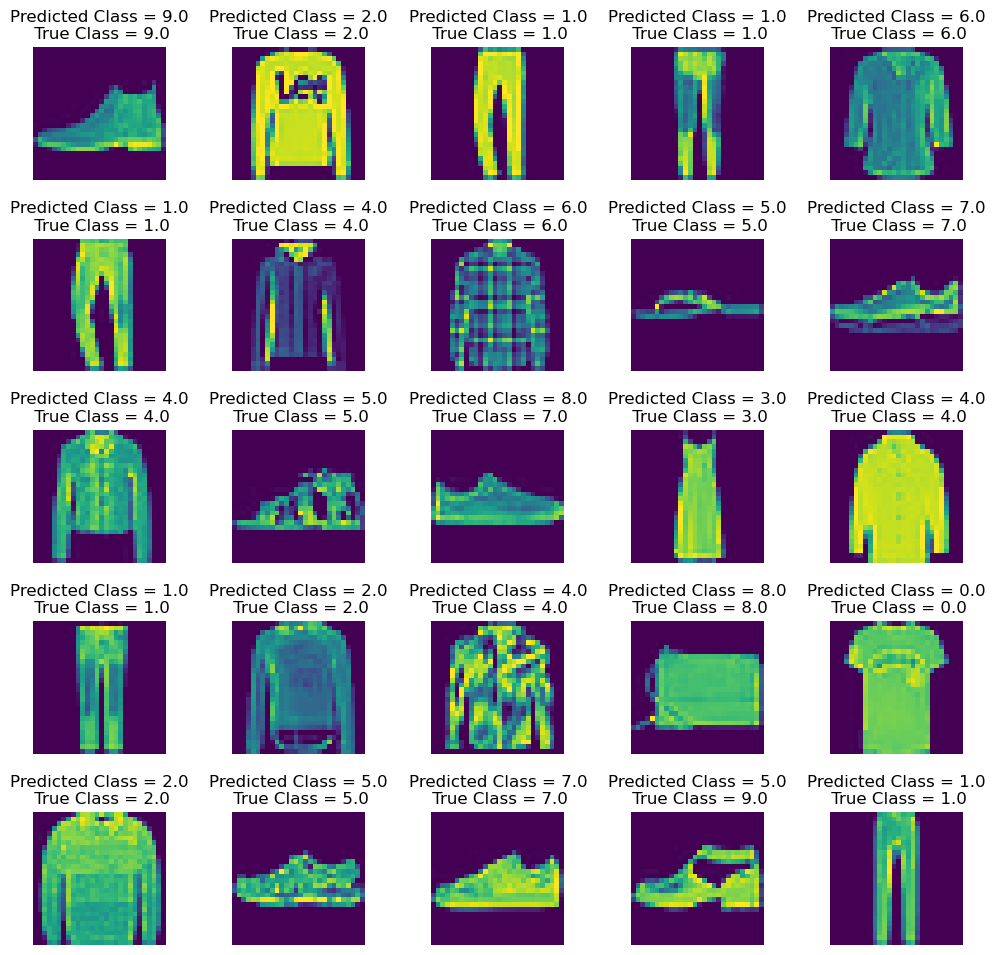

In [11]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Predicted Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
print(cm)

[[814   4  30  28   8   0 105   0  11   0]
 [  0 987   0  10   2   0   0   0   1   0]
 [ 11   2 791   5 154   0  36   0   1   0]
 [  7  21  15 889  46   1  20   0   1   0]
 [  0   1  21   9 957   0  11   0   1   0]
 [  0   0   0   0   0 996   0   3   1   0]
 [ 74   3  68  25 190   0 628   0  12   0]
 [  0   0   0   0   0  67   0 914   5  14]
 [  2   2   1   2   2   1   0   0 990   0]
 [  0   0   0   0   0  21   0  33   6 940]]


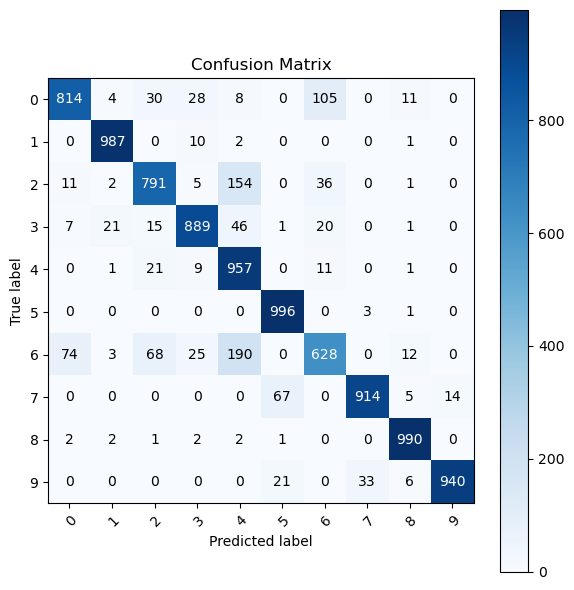

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute
cm = confusion_matrix(y_test, predicted_classes)
classes = np.unique(y_test)  # or supply your own list of class names

fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar(im)

# Ticks/labels
ax.set(
    xticks=np.arange(len(classes)),
    yticks=np.arange(len(classes)),
    xticklabels=classes,
    yticklabels=classes,
    ylabel='True label',
    xlabel='Predicted label',
    title='Confusion Matrix'
)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Write numbers in each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


In [17]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ['class {}'.format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

     class 0       0.90      0.81      0.85      1000
     class 1       0.97      0.99      0.98      1000
     class 2       0.85      0.79      0.82      1000
     class 3       0.92      0.89      0.90      1000
     class 4       0.70      0.96      0.81      1000
     class 5       0.92      1.00      0.95      1000
     class 6       0.79      0.63      0.70      1000
     class 7       0.96      0.91      0.94      1000
     class 8       0.96      0.99      0.98      1000
     class 9       0.99      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [3]:
from tensorflow import keras

cnn_model = keras.models.load_model("model.h5")

In [8]:
import tensorflow as tf
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

cnn_predicted_classes = cnn_model.predict(X_test)
cnn_predicted_classes=np.argmax(cnn_predicted_classes,axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [11]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ['class {}'.format(i) for i in range(num_classes)]
# print(classification_report(y_test, cnn_predicted_classes, target_names=target_names))
print(cnn_predicted_classes)

[5 7 7 ... 7 7 7]


**PRACTICE OPPORTUNITY #3:**
- **Add a new dense layer containing 1024 neurons**
- **Increase the number of epochs**
- **Plot the model summary and determine the number of trainable parameters**
- **Retrain the model and evaluate its performance**

# GREAT JOB!

# PRACTICE OPPORTUNITIES SOLUTIONS 

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **Check out the sizes of both training and testing datasets**

In [86]:
X_train.shape

(60000, 28, 28, 1)

In [87]:
X_test.shape

(10000, 28, 28, 1)

In [88]:
y_train.shape

(60000, 10)

In [89]:
y_test.shape

(10000,)

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Plot a grid containing 144 images and perform a sanity check on the data** 

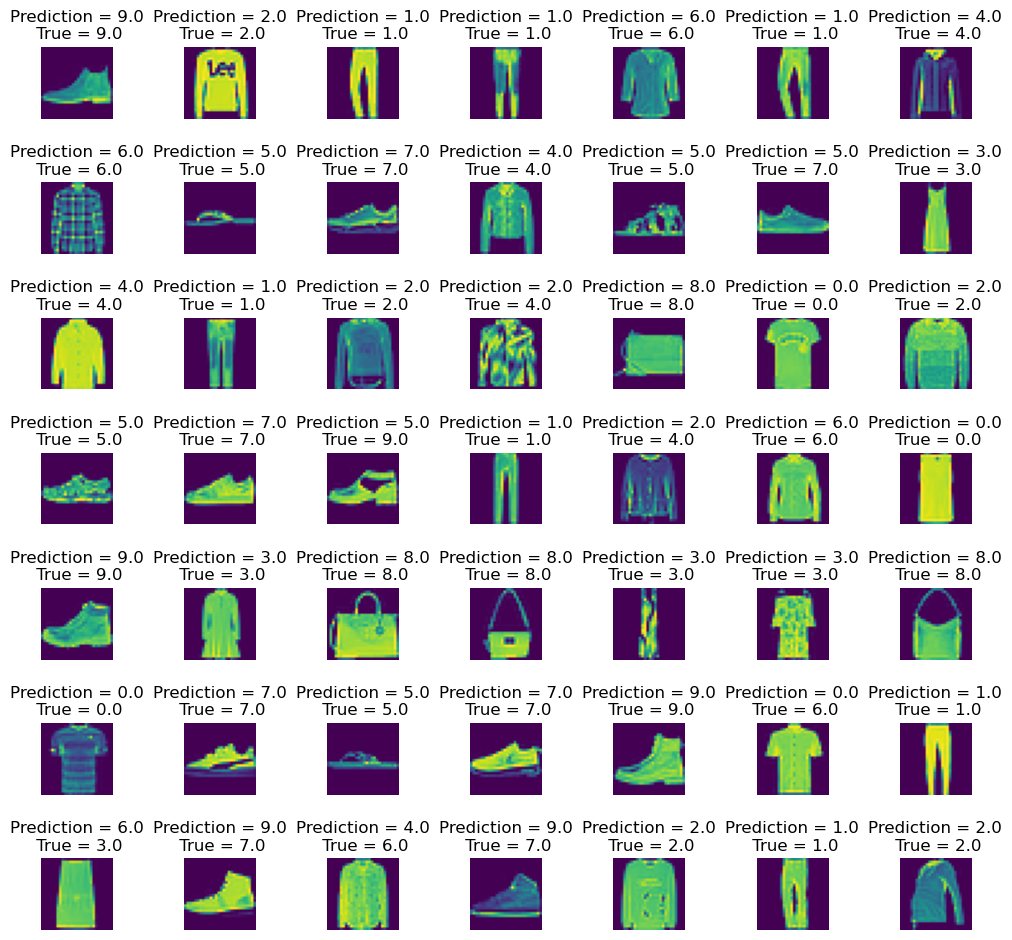

In [90]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction = {:0.1f}\n True = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

**PRACTICE OPPORTUNITY #3 SOLUTION:**
- **Add a new dense layer containing 1024 neurons**
- **Increase the number of epochs**
- **Plot the model summary and determine the number of trainable parameters**
- **Retrain the model and evaluate its performance**

In [91]:
from tensorflow.keras import datasets, layers, models
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)  ))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu' ))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu' ))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))
cnn.add(layers.Dense(1000, activation = 'relu'))
cnn.add(layers.Dense(10, activation = 'softmax'))
cnn.summary()

f:\Miniforge\envs\machine\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1000)           │        65,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,682 (655.01 KB)

 Trainable params: 167,682 (655.01 KB)

 Non-trainable params: 0 (0.00 B)